[[346 476]
 [273 181]
 [832  45]
 [904 339]]


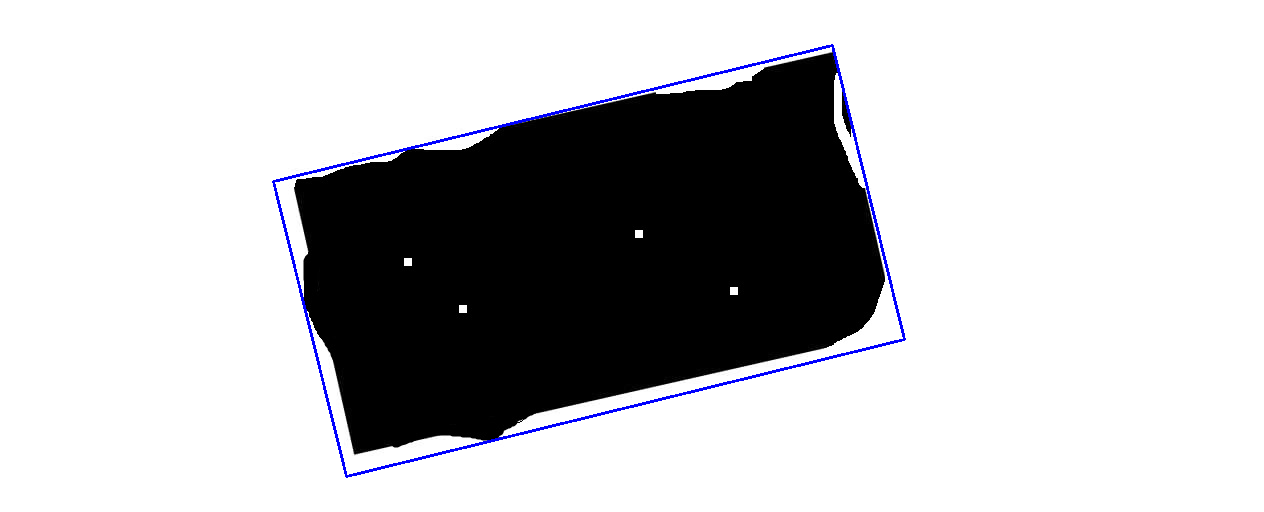

(589.2095947265625, 260.89764404296875) (575.02783203125, 303.5799560546875) -13.760785102844238


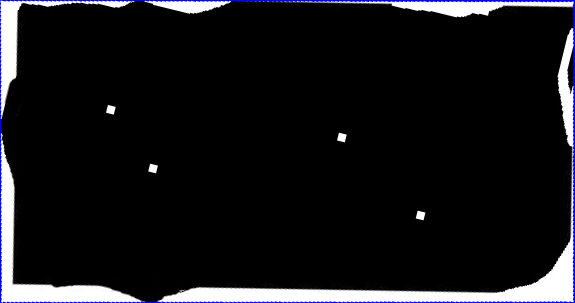

In [69]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('rimage.jpg')
imgGry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

low_threshold = 50
high_threshold = 150
edges = cv2.Canny(imgGry, low_threshold, high_threshold)
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the convex hull object for each contour
hull_list = []
max_S = -1
best_box = None
best_rect = None

for i in range(len(contours)):
    rect = cv2.minAreaRect( contours[i] )
    w,h = rect[1]
    S = w * h
    if S > max_S:
      max_S = S
      box = cv2.boxPoints(rect)
      best_box = np.int0(box)
      best_rect = rect
      #print(box)
      
print(best_box)
 
best_box = best_box.reshape((-1, 1, 2))
isClosed = True
  
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2

image = cv2.polylines(img, [best_box], 
                      isClosed, color, thickness)


cv2_imshow(image)

def getSubImage(rect, src):
    # Get center, size, and angle from rect
    center, size, theta = rect
    print(center, size, theta)
    # Convert to int 
    center, size = tuple(map(int, center)), tuple(map(int, size))
    # Get rotation matrix for rectangle
    M = cv2.getRotationMatrix2D( center, theta, 1)
    # Perform rotation on src image
    dst = cv2.warpAffine(src, M, (src.shape[1] ,src.shape[0]))
    out = cv2.getRectSubPix(dst, size, center)
    return out

barcode = getSubImage(best_rect, img)
cv2_imshow(barcode)

